I have created a small web app for the assignment, but I was unable to complete it due to time constraints. I am providing a link to view the rest of the app.

Link:- https://amityadav-swift-assignment.streamlit.app/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Reading csv file
cust_trans = pd.read_csv('customer_transaction_details.csv')
cust = pd.read_csv('customers_df.csv')

In [4]:
cust_trans.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [5]:
cust.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [6]:
cust_trans.columns, cust.columns, cust_trans.shape, cust.shape 

(Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
        'paymentMethodId', 'paymentMethodRegistrationFailure',
        'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
        'transactionFailed', 'orderState'],
       dtype='object'),
 Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
        'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
        'No_Orders', 'No_Payments', 'Fraud'],
       dtype='object'),
 (623, 11),
 (168, 10))

In [7]:
cust.info(), cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            -----

(None, None)

In [8]:
# Merge the dataframes on the 'customerEmail' column
merged_df = pd.merge(cust, cust_trans, on='customerEmail', how='inner')
merged_df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [9]:
# Remove the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
merged_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


# EDA

In [10]:
print(f"Merged dataframe have {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")

Merged dataframe have 819 rows and 18 columns


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   customerPhone                     819 non-null    object
 2   customerDevice                    819 non-null    object
 3   customerIPAddress                 819 non-null    object
 4   customerBillingAddress            819 non-null    object
 5   No_Transactions                   819 non-null    int64 
 6   No_Orders                         819 non-null    int64 
 7   No_Payments                       819 non-null    int64 
 8   Fraud                             819 non-null    bool  
 9   transactionId                     819 non-null    object
 10  orderId                           819 non-null    object
 11  paymentMethodId                   819 non-null    object
 12  paymentMethodRegistrat

In [12]:
merged_df.describe()

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.195360,3.808303,2.135531,0.100122,35.147741,0.256410
std,2.924214,1.866872,1.860001,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,15.000000,8.000000,15.000000,1.000000,353.000000,1.000000


In [13]:
# number of null values in each column
merged_df.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

<Figure size 1000x600 with 0 Axes>

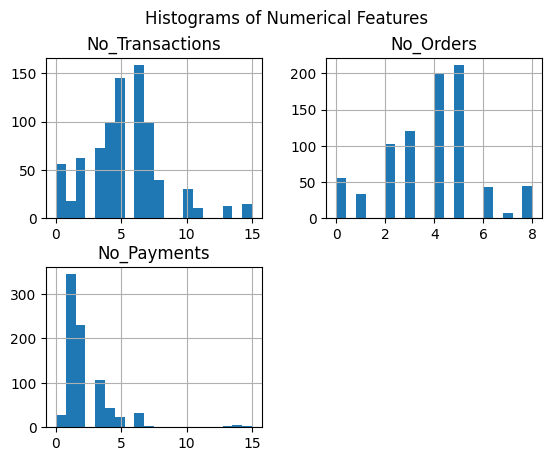

In [14]:
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments']
# Histograms for numerical features
plt.figure(figsize=(10, 6))
merged_df[numerical_features].hist(bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

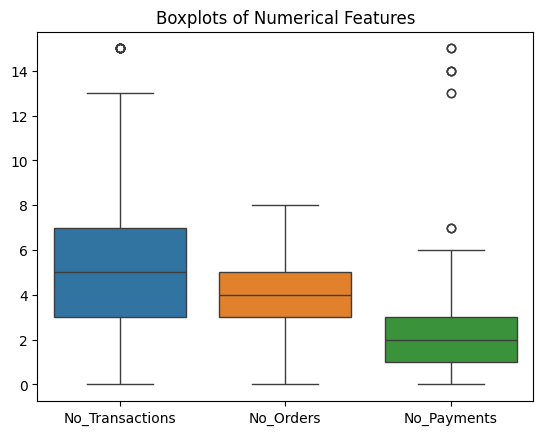

In [15]:
# Boxplots for numerical features
sns.boxplot(data=merged_df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

As there are Outliers in the No_Payments and No_Orders columns, Removing is the best solution for proper further analysis

In [16]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

# Remove outliers
merged_df_cleaned = merged_df[~outliers.any(axis=1)]
merged_df_cleaned.shape

(792, 18)

Given that the outliers account for only about 3.3% of the total data (27 out of 819 rows) and without a clear understanding of their origin or impact, I’ve decided to remove them. This choice is justified because the outliers represent a small portion of the dataset, and their presence could potentially skew the analysis or degrade model performance. However, it's crucial to document this decision and be mindful of any effects it might have on the overall analysis.

In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

# Get rows containing outliers
outlier_rows = merged_df[outliers.any(axis=1)]


outlier_rows.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
338,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,h469bpo6,d5r0n3,d1nvhtt2q,0,card,Diners Club / Carte Blanche,14,0,fulfilled
339,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,vj05ozm5,8lc2cq,d1nvhtt2q,0,card,Diners Club / Carte Blanche,23,0,fulfilled


In [18]:
categorical_columns = ['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionFailed', 'orderState']

# Store the numerical counts for each category in a dictionary
category_frequencies = {}
for column in categorical_columns:
    frequency = merged_df_cleaned[column].value_counts()
    category_frequencies[column] = frequency

# Display the frequency counts
for column, frequency in category_frequencies.items():
    print(f'Frequency counts for {column}:')
    print(frequency)
    print()

Frequency counts for paymentMethodRegistrationFailure:
paymentMethodRegistrationFailure
0    713
1     79
Name: count, dtype: int64

Frequency counts for paymentMethodType:
paymentMethodType
card         626
bitcoin       64
paypal        55
apple pay     47
Name: count, dtype: int64

Frequency counts for paymentMethodProvider:
paymentMethodProvider
JCB 16 digit                   167
VISA 16 digit                  165
Maestro                        103
Voyager                         81
American Express                62
VISA 13 digit                   57
JCB 15 digit                    45
Discover                        41
Diners Club / Carte Blanche     40
Mastercard                      31
Name: count, dtype: int64

Frequency counts for transactionFailed:
transactionFailed
0    596
1    196
Name: count, dtype: int64

Frequency counts for orderState:
orderState
fulfilled    671
failed        84
pending       37
Name: count, dtype: int64



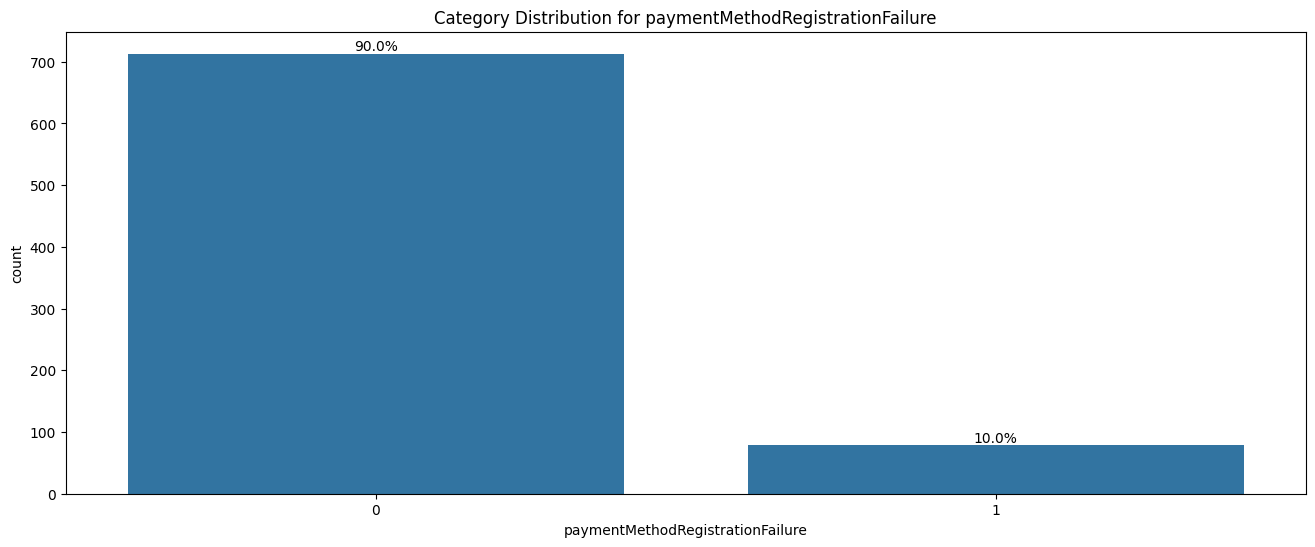

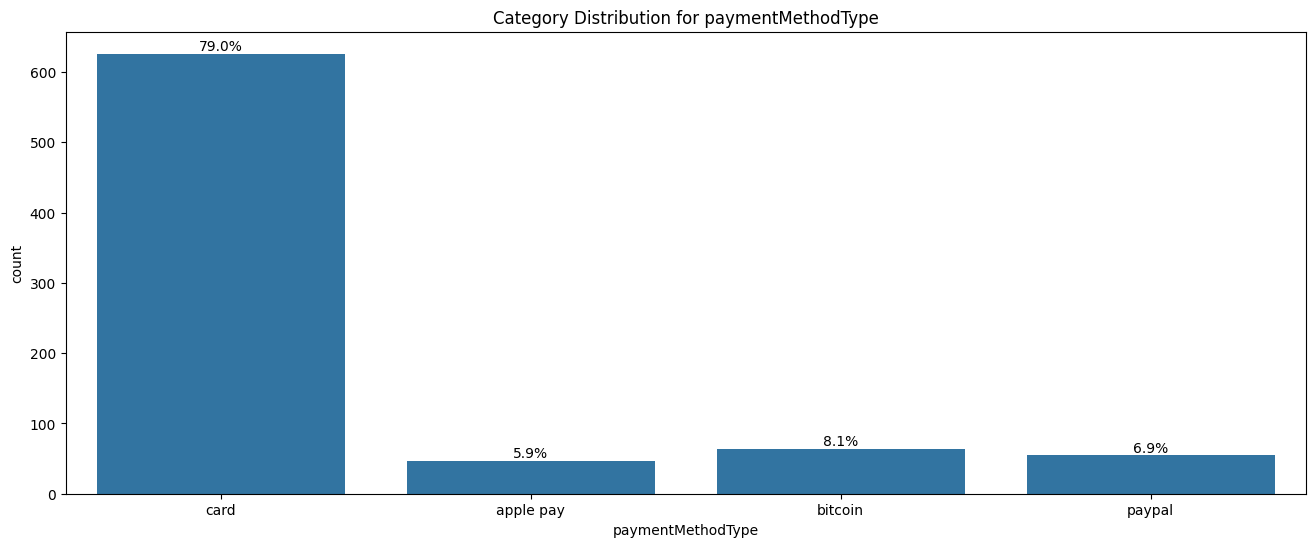

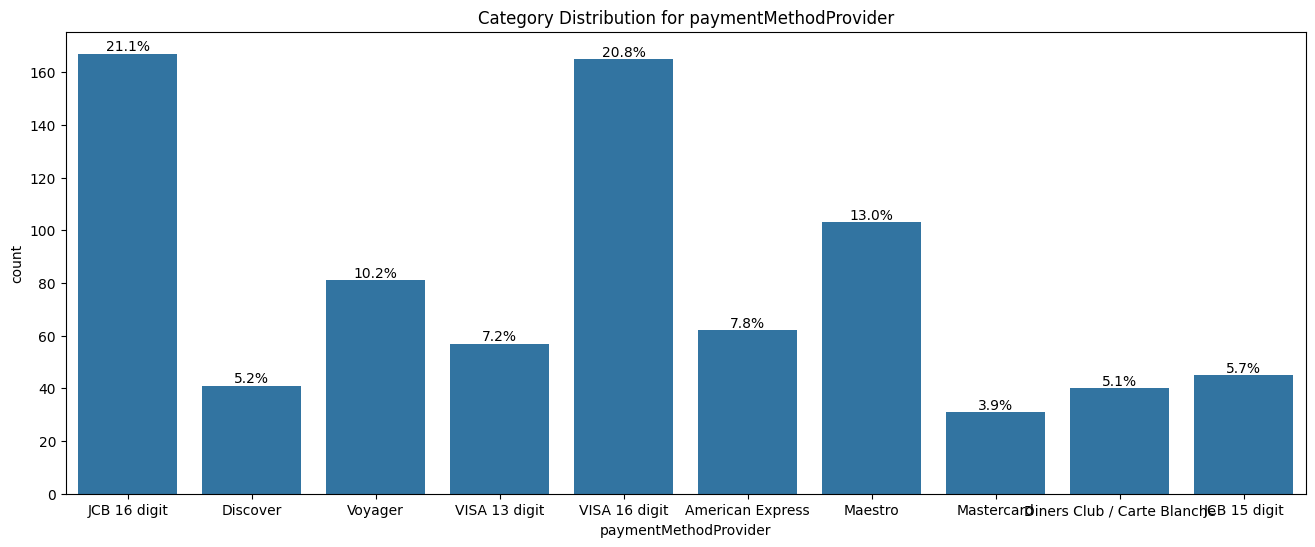

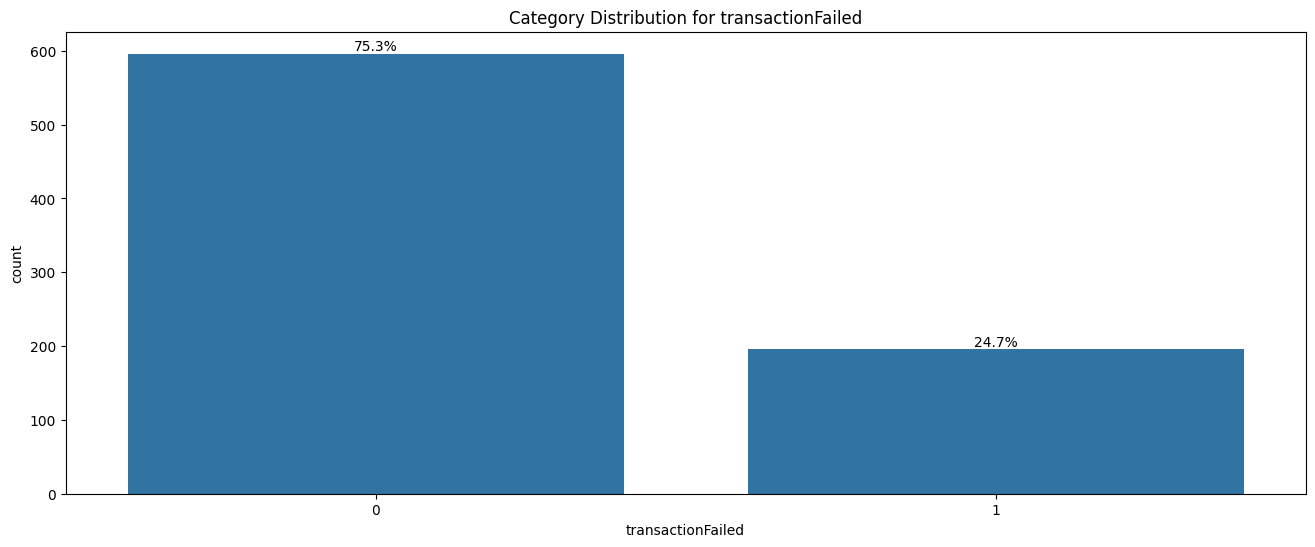

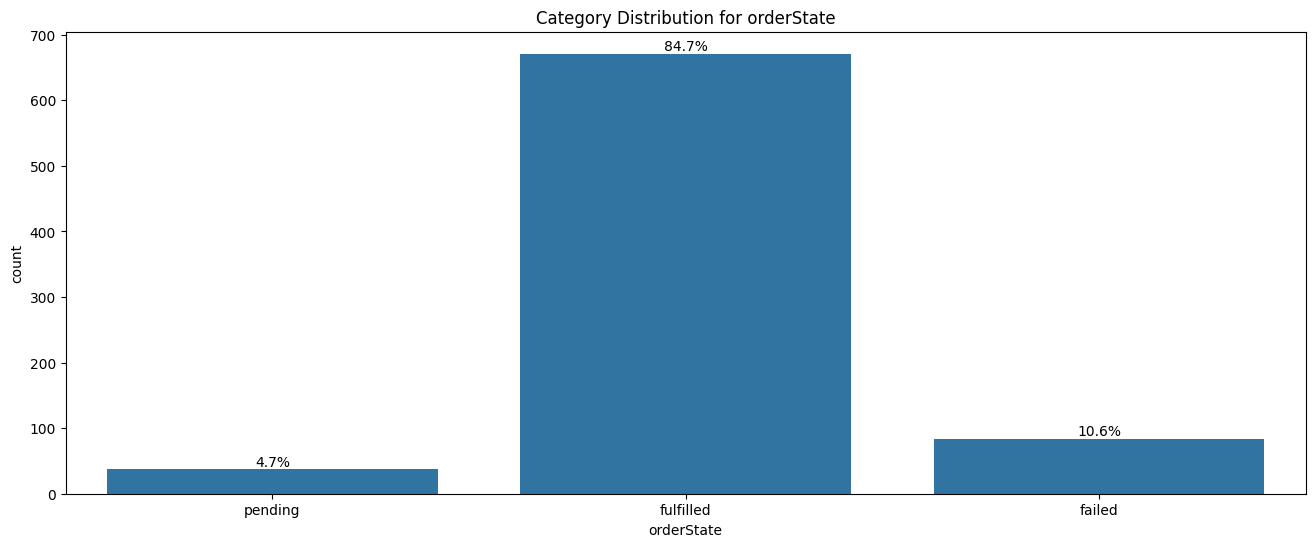

In [19]:
categorical_columns_to_plot = ['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionFailed', 'orderState']

for column in categorical_columns_to_plot:
    plt.figure(figsize=(16, 6))
    plot = sns.countplot(data=merged_df_cleaned, x=column)

    # Calculate and annotate percentages for each category
    total_entries = len(merged_df_cleaned)
    for bar in plot.patches:
        percentage = '{:.1f}%'.format(100 * bar.get_height() / total_entries)
        xpos = bar.get_x() + bar.get_width() / 2
        ypos = bar.get_height()
        plot.annotate(percentage, (xpos, ypos), ha='center', va='bottom')

    plt.title(f'Category Distribution for {column}')
    plt.show()


### Payment Insights

1. **Payment Method Registration Failure**
   - **Insight**: 10% of payment attempts fail.
   - **Implication**: This high failure rate could indicate issues with the payment process or user experience, potentially impacting customer satisfaction and revenue.

2. **Payment Method Type**
   - **Card**: 79%
   - **Bitcoin**: 8.1%
   - **Paypal**: 6.9%
   - **Apple Pay**: 5.9%
   - **Insight**: The majority of customers prefer card payments. Understanding these preferences can help tailor marketing strategies and establish partnerships with payment providers.

3. **Payment Method Provider**
   - **JCB 16 digit**: 21.1%
   - **VISA 16 digit**: 20.8%
   - **Maestro**: 13%
   - **Voyager**: 10.2%
   - **American Express**: 7.8%
   - **VISA 13 digit**: 7.2%
   - **Diners Club / Carte Blanche**: 5.1%
   - **JCB 15 digit**: 5.7%
   - **Discover**: 5.2%
   - **Mastercard**: 3.9%
   - **Insight**: The distribution of payment providers varies, affecting decisions related to processing fees, security measures, and partnerships.

4. **Transaction Failed**
   - **Insight**: 24% of transactions fail.
   - **Implication**: A high failure rate might suggest technical problems, potential fraud, or issues with payment processing, all of which could significantly impact the business.

5. **Order State**
   - **Insight**: 15.3% of orders are either failed or pending.
   - **Implication**: A high rate of failed or pending orders may indicate inefficiencies in order processing and fulfillment, highlighting areas for improvement.


In [48]:
merged_df_cleaned.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
5,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled


# Correlation Analysis

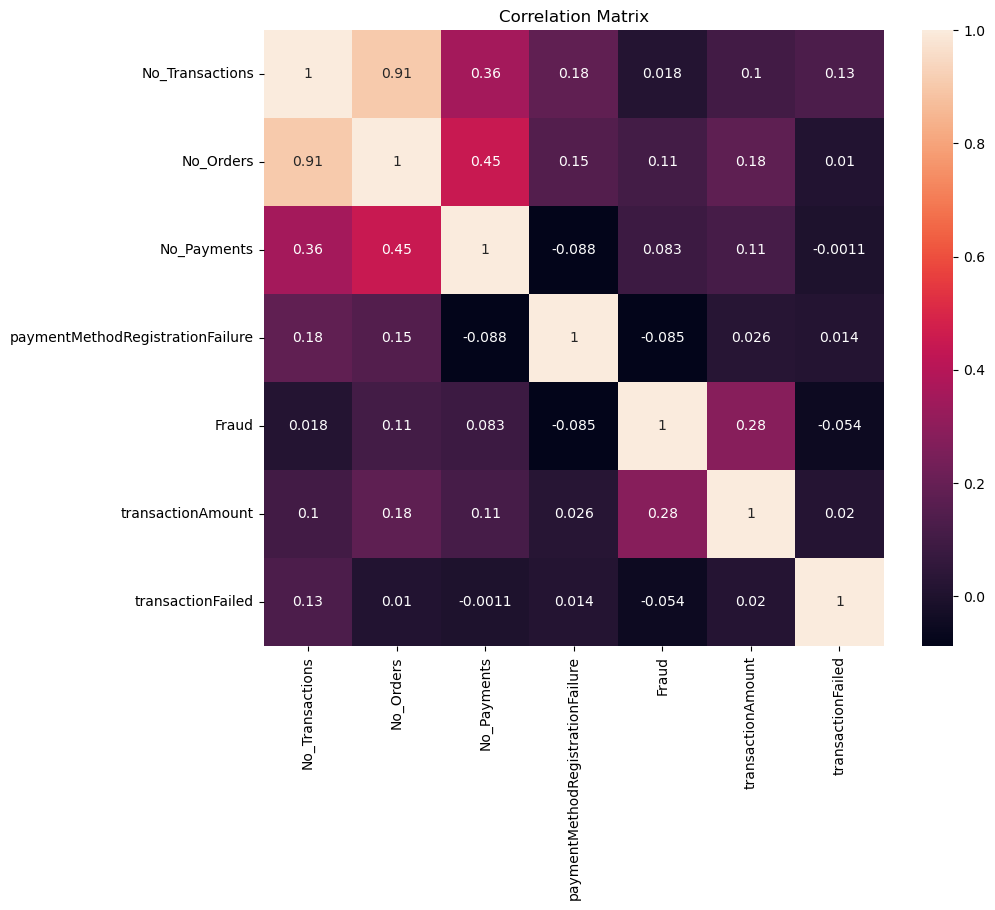

In [51]:
# Correlation matrix
correlation_matrix = merged_df_cleaned[["No_Transactions","No_Orders","No_Payments", "paymentMethodRegistrationFailure", "Fraud","transactionAmount","transactionFailed"]].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Correlation Matrix Insights

1. **No_Transactions:**
   - Strongly positively correlated with **No_Orders** (0.906).
   - Moderately correlated with **transactionFailed** (0.132).
   - Weakly correlated with other variables.

2. **No_Orders:**
   - Strongly positively correlated with **No_Transactions** (0.906).
   - Moderately correlated with **transactionAmount** (0.178).
   - Weakly correlated with other variables.

3. **No_Payments:**
   - Weakly correlated with **No_Transactions** (0.357) and **No_Orders** (0.448).
   - No strong correlation with other variables.

4. **Fraud:**
   - Very weakly correlated with most variables.
   - Moderately correlated with **transactionAmount** (0.283).

5. **paymentMethodRegistrationFailure:**
   - Weakly correlated with **No_Transactions** (0.182).
   - Very weakly correlated with other variables.

6. **transactionAmount:**
   - Moderately correlated with **Fraud** (0.283) and **No_Orders** (0.178).
   - Weakly correlated with **No_Transactions** (0.102).

7. **transactionFailed:**
   - Weakly correlated with **No_Transactions** (0.132).
   - Very weakly correlated with other variables.


# Transaction Metrics and Fraud Analysis

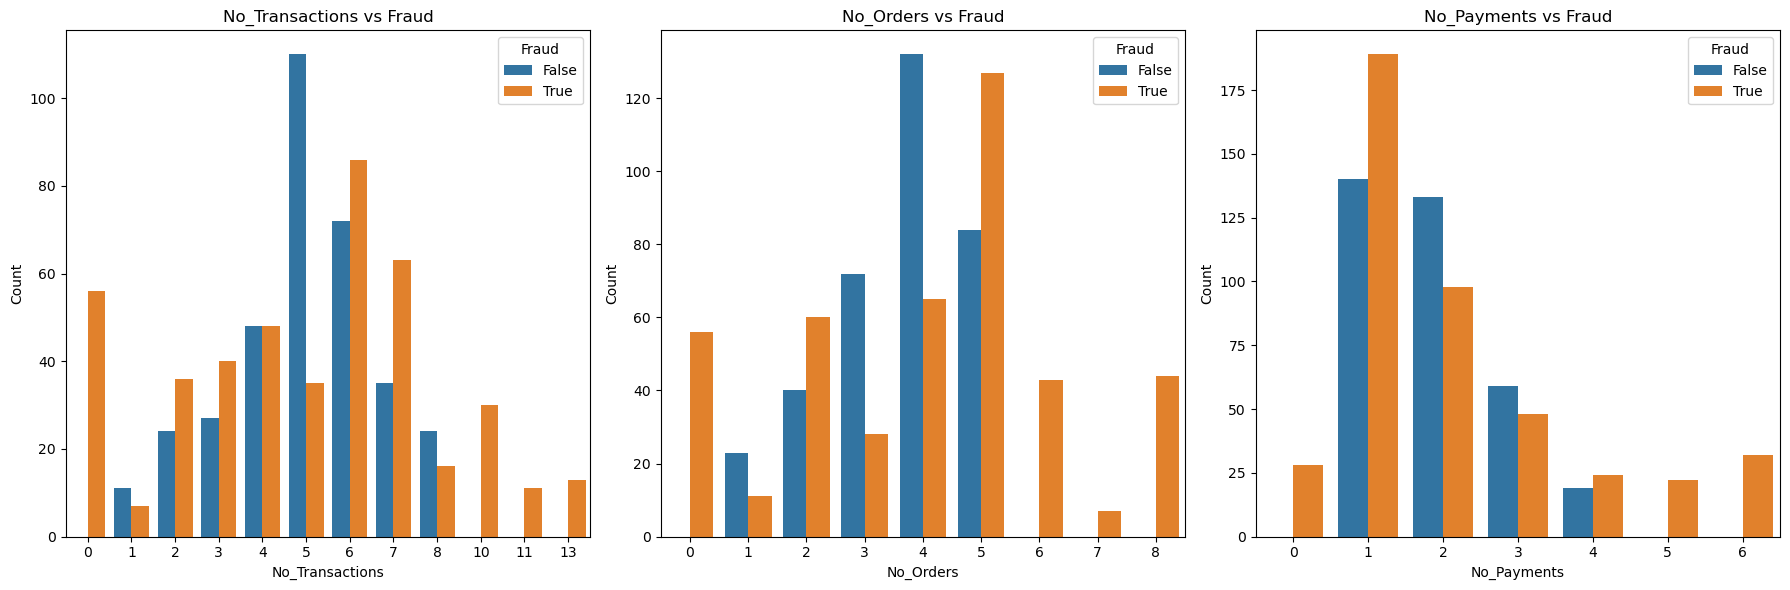

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for No_Transactions
sns.countplot(data=merged_df_cleaned, x='No_Transactions', hue='Fraud', ax=axes[0])
axes[0].set_title('No_Transactions vs Fraud')
axes[0].set_xlabel('No_Transactions')
axes[0].set_ylabel('Count')

# Plot for No_Orders
sns.countplot(data=merged_df_cleaned, x='No_Orders', hue='Fraud', ax=axes[1])
axes[1].set_title('No_Orders vs Fraud')
axes[1].set_xlabel('No_Orders')
axes[1].set_ylabel('Count')

# Plot for No_Payments
sns.countplot(data=merged_df_cleaned, x='No_Payments', hue='Fraud', ax=axes[2])
axes[2].set_title('No_Payments vs Fraud')
axes[2].set_xlabel('No_Payments')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Insights from the Graph

1. **Number of Transactions:**
   - A customer with more than 8 transactions is definitely considered a fraud.

2. **Number of Orders:**
   - A customer with more than 5 orders is definitely considered a fraud.

3. **Number of Payments:**
   - A customer with more than 4 payments is definitely considered a fraud.

# Feature Engineering

In [59]:
merged_df_cleaned.loc[:, 'Transaction_Success_Rate'] = merged_df_cleaned['No_Transactions'] / (merged_df_cleaned['No_Transactions'] + merged_df_cleaned['transactionFailed'])

#Reasoning: This feature captures the proportion of successful transactions for each customer,
#providing insights into their transaction success rate.

In [63]:
merged_df_cleaned = merged_df_cleaned.copy()

# Calculate the order frequency
merged_df_cleaned['Order_Frequency'] = merged_df_cleaned['No_Orders'] / merged_df_cleaned['No_Transactions']

# Reasoning: The Order Frequency feature indicates how often a customer places orders relative to the total number of transactions they make. 
# This metric helps understand whether a customer tends to place multiple orders per transaction or if their ordering behavior is less frequent.

In [65]:
merged_df_cleaned['Past_Fraud_Transactions'] = merged_df_cleaned['Fraud'].cumsum().shift(fill_value=0)

In [67]:
merged_df_cleaned['Transaction_TotalAmount'] = merged_df_cleaned['No_Transactions'] * merged_df_cleaned['transactionAmount']

# Reasoning: This feature calculates the total transaction amount for each customer by multiplying the number of transactions 
# by the transaction amount. It captures the overall monetary involvement of each customer

In [69]:
# Fill NaN values with 0
data = merged_df_cleaned.fillna(0)

pd.set_option('display.max_columns', None)

data.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions', 'Transaction_TotalAmount'],
      dtype='object')

In [71]:
data.select_dtypes(include=['object']).columns.tolist()

['customerEmail',
 'customerPhone',
 'customerDevice',
 'customerIPAddress',
 'customerBillingAddress',
 'transactionId',
 'orderId',
 'paymentMethodId',
 'paymentMethodType',
 'paymentMethodProvider',
 'orderState']

In [73]:
#cat_cols contains the names of categorical columns
cat_cols = ['customerEmail',
 'customerPhone',
 'customerDevice',
 'customerIPAddress',
 'customerBillingAddress',
 'transactionId',
 'orderId',
 'paymentMethodId',
 'paymentMethodType',
 'paymentMethodProvider',
 'orderState'] 

# Create a copy of the DataFrame to avoid modifying the original data
data_encoded = data.copy()

# Iterate over each categorical column
for col in cat_cols:
    # Calculate the frequency of each category
    freq = data_encoded[col].value_counts(normalize=True)
    
    # Map the frequency values to the original categories
    data_encoded[col + '_freq_encoded'] = data_encoded[col].map(freq)

# Drop the original categorical columns if needed
data_encoded.drop(cat_cols, axis=1, inplace=True)
data_encoded.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions', 'Transaction_TotalAmount',
       'customerEmail_freq_encoded', 'customerPhone_freq_encoded',
       'customerDevice_freq_encoded', 'customerIPAddress_freq_encoded',
       'customerBillingAddress_freq_encoded', 'transactionId_freq_encoded',
       'orderId_freq_encoded', 'paymentMethodId_freq_encoded',
       'paymentMethodType_freq_encoded', 'paymentMethodProvider_freq_encoded',
       'orderState_freq_encoded'],
      dtype='object')

# Feature Selection

In [129]:
df_selected = data_encoded[['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions', 'Transaction_TotalAmount',
       'customerEmail_freq_encoded', 'customerPhone_freq_encoded',
       'customerDevice_freq_encoded', 'customerIPAddress_freq_encoded',
       'customerBillingAddress_freq_encoded', 'transactionId_freq_encoded',
       'orderId_freq_encoded', 'paymentMethodId_freq_encoded',
       'paymentMethodType_freq_encoded', 'paymentMethodProvider_freq_encoded',
       'orderState_freq_encoded']]


# Split the data into features (X) and target variable (y)
X = df_selected.drop('Fraud', axis=1)
y = df_selected['Fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

Accuracy: 0.949685534591195
                                Feature  Importance
13       customerIPAddress_freq_encoded    0.146609
12          customerDevice_freq_encoded    0.088956
2                           No_Payments    0.078327
4                     transactionAmount    0.073810
10           customerEmail_freq_encoded    0.073063
14  customerBillingAddress_freq_encoded    0.072320
8               Past_Fraud_Transactions    0.071632
1                             No_Orders    0.066196
11           customerPhone_freq_encoded    0.057258
17         paymentMethodId_freq_encoded    0.057145
9               Transaction_TotalAmount    0.049271
7                       Order_Frequency    0.036189
19   paymentMethodProvider_freq_encoded    0.032738
16                 orderId_freq_encoded    0.025225
15           transactionId_freq_encoded    0.024222
18       paymentMethodType_freq_encoded    0.014139
0                       No_Transactions    0.013571
20              orderState_freq_enco

In [133]:
X = data_encoded.drop(columns=['Fraud'])
y = data_encoded['Fraud']

# Initialize a random forest classifier 
clf = RandomForestClassifier()

# Initialize RFE with the classifier and the number of features to select
rfe = RFE(estimator=clf, n_features_to_select=10)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})

# Print the selected features
print(selected_features[selected_features['Selected']])

                                Feature  Selected
1                             No_Orders      True
2                           No_Payments      True
4                     transactionAmount      True
8               Past_Fraud_Transactions      True
9               Transaction_TotalAmount      True
10           customerEmail_freq_encoded      True
11           customerPhone_freq_encoded      True
12          customerDevice_freq_encoded      True
13       customerIPAddress_freq_encoded      True
14  customerBillingAddress_freq_encoded      True


# Model Building

In [137]:
# Select the features
selected_features = [
    'No_Orders', 'No_Payments', 'transactionAmount', 'Past_Fraud_Transactions',
    'Transaction_TotalAmount', 'customerEmail_freq_encoded', 'customerDevice_freq_encoded',
    'customerIPAddress_freq_encoded', 'customerBillingAddress_freq_encoded',
    'paymentMethodId_freq_encoded'
]

# Prepare the feature matrix X and target vector y
X = data_encoded[selected_features]
y = data_encoded['Fraud']  # Assuming 'Fraud' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9308176100628931


#### Model Evaluation (Accuracy=0.94)

In [141]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.9756
Recall: 0.8989
F1-score: 0.9357


In [145]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[68  2]
 [ 9 80]]


### Model Performance Metrics

- **True Negative (TN)**: 68 instances were correctly predicted as negative.
- **False Positive (FP)**: 2 instances were incorrectly predicted as positive when they were actually negative.
- **False Negative (FN)**: 9 instances were incorrectly predicted as negative when they were actually positive.
- **True Positive (TP)**: 80 instances were correctly predicted as positive.

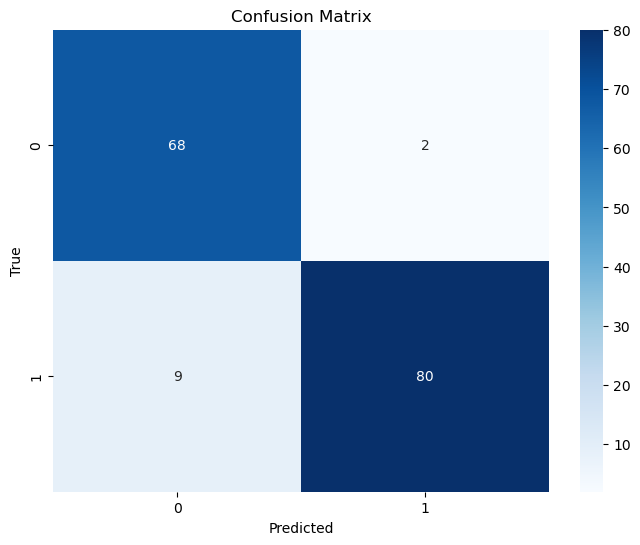

In [88]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [149]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.93        70
        True       0.98      0.90      0.94        89

    accuracy                           0.93       159
   macro avg       0.93      0.94      0.93       159
weighted avg       0.93      0.93      0.93       159



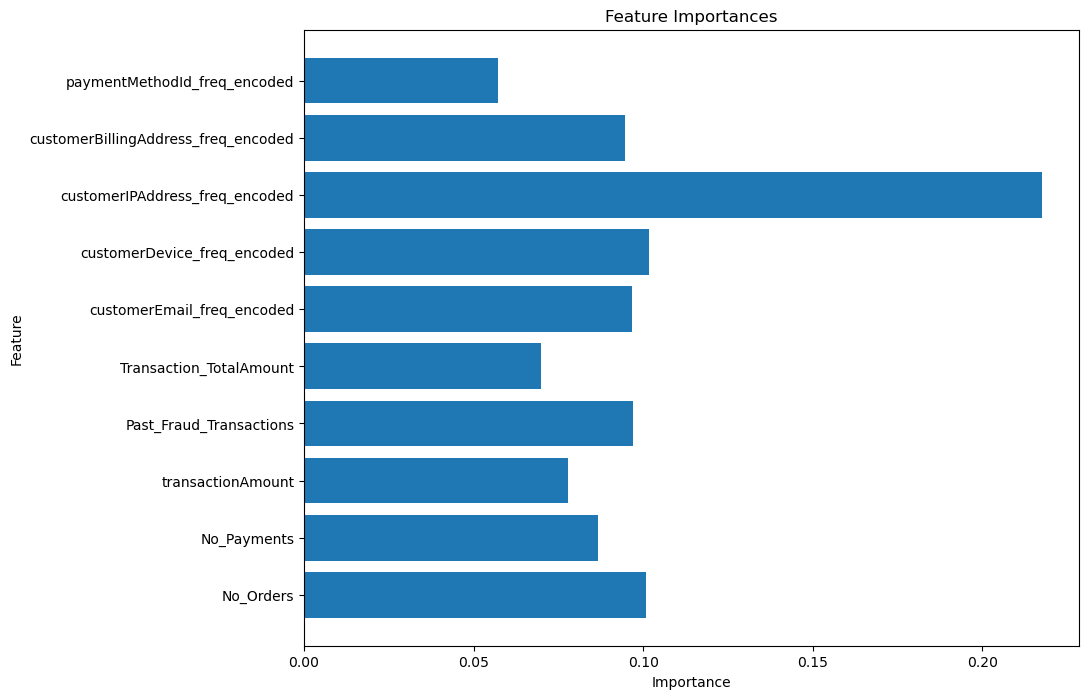

In [92]:
# Extract feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(selected_features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()